# OpenCV Trackers

In [25]:
%matplotlib inline 

from __future__ import print_function
# these imports let you use opencv
import cv2          # opencv itself
import numpy as np  # matrix manipulations

from matplotlib import pyplot as plt           # this lets you draw inline pictures in the notebooks
import pylab                                   # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

In [40]:
cvTrackers = {
    'BOOSTING': cv2.TrackerBoosting_create,
    'MIL': cv2.TrackerMIL_create,
    'KCF': cv2.TrackerKCF_create,
    'TLD': cv2.TrackerTLD_create,
    'MEDIANFLOW': cv2.TrackerMedianFlow_create,
    'GOTURN': cv2.TrackerGOTURN_create
}

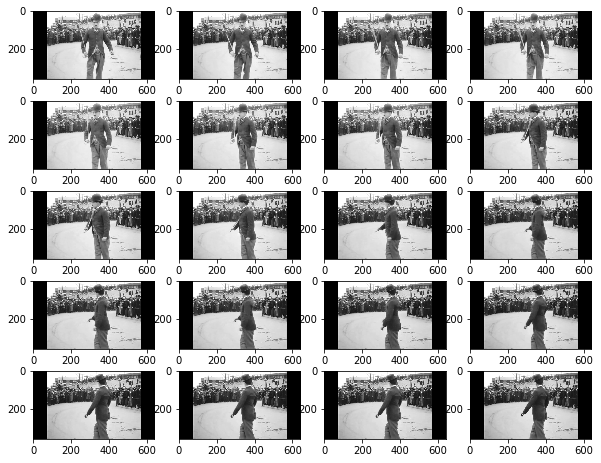

In [41]:
# Read video
video = cv2.VideoCapture("chaplin.mp4")

# Exit if video not opened.
if not video.isOpened():
    print("Could not open video")
    sys.exit()

# Read first frame.
ok, frame = video.read()
if not ok:
    print('Cannot read video file')
    sys.exit()
    
pics = []
for i in range(20):
    ok, frame = video.read()
    if not ok:
        print('Error')
        break
    pics.append(frame)

for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(pics[i])

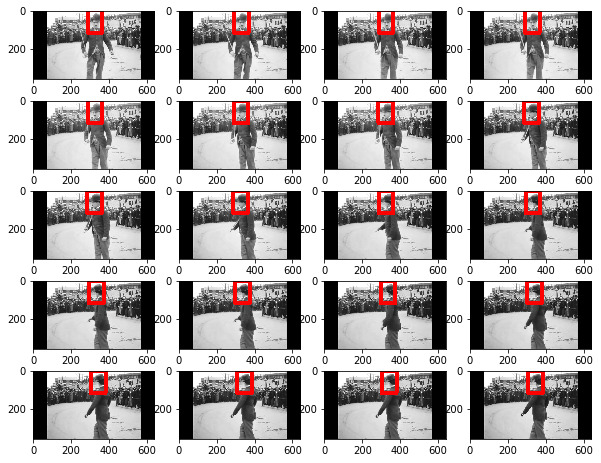

In [42]:
tracker = cvTrackers['KCF']()
# Define an initial bounding box
bbox = (287, 2, 77, 116)
ok = tracker.init(pics[0], bbox)

for i, frame in enumerate(pics):
    f = frame.copy()
    ok, bbox = tracker.update(f)
    # Draw bounding bxox
    if ok:
        # Tracking success
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        cv2.rectangle(f, p1, p2, (255,0,0), 20)
    else:
        print('Crap')
    
    plt.subplot(5,4,i+1)
    plt.imshow(f)